In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Requirement already up-to-date: torch in /usr/local/lib/python3.7/dist-packages (1.8.1+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.7/dist-packages (0.9.1+cu101)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-f5r_8_0e
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-f5r_8_0e
  Created wheel for fvcore: filename=fvcore-0.1.5-cp37-none-any.whl size=62712 sha256=8250b432a24ee01416cfbda0734cc119d256091ed3584f3f2f1dd2b271577e28
  Stored in directory: /tmp/pip-ephem-wheel-cache-ush3xyb_/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
Successfully built fvcore


'1.8.1+cu101'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 11403 (delta 11), reused 23 (delta 9), pack-reused 11337
Receiving objects: 100% (11403/11403), 4.60 MiB | 8.19 MiB/s, done.
Resolving deltas: 100% (8289/8289), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 71kB 3.3MB/s 
     |████████████████████████████████| 112kB 8.6MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=21dfd1cb0325eed5ecb2eb500221cb81352e906ac0e9fedc48e8109d1ccbe956
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime
  Found existing installation: iopath 0.1.8
    Uninstalling iopath-0.1.8:
      Successfully uninstalled iopath-0.1.8
  Running setup.py develop for detectron2


In [ ]:
!cp -r "./drive/MyDrive/Datasets/Microcontroller-Segmentation" "."

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("micro_train", {}, "./Microcontroller-Segmentation/train.json", "./Microcontroller-Segmentation/train")
register_coco_instances("micro_test", {}, "./Microcontroller-Segmentation/test.json", "./Microcontroller-Segmentation/test")


In [ ]:
train_metadata = MetadataCatalog.get("micro_train")
dataset_dicts = DatasetCatalog.get("micro_train")

WARNING [03/31 10:42:10 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/31 10:42:10 d2.data.datasets.coco]: Loaded 142 images in COCO format from ./Microcontroller-Segmentation/train.json


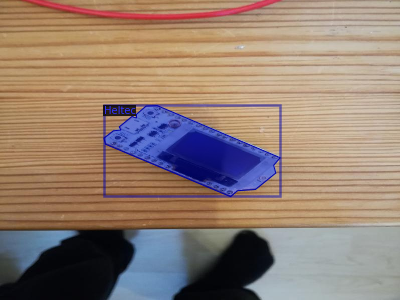

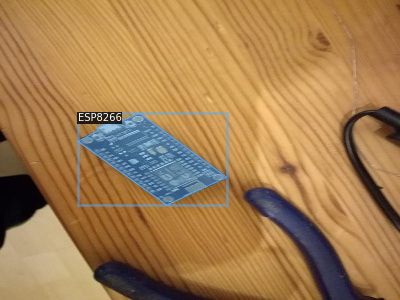

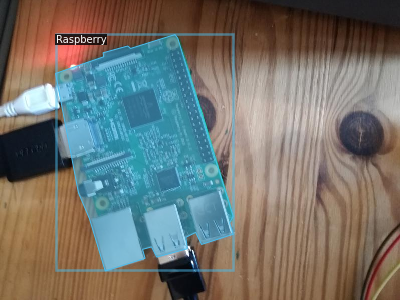

In [ ]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("micro_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/31 10:42:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:14, 12.4MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

[03/31 10:42:44 d2.engine.train_loop]: Starting training from iteration 0
[03/31 10:43:11 d2.utils.events]:  eta: 0:21:18  iter: 19  total_loss: 2.237  loss_cls: 1.404  loss_box_reg: 0.135  loss_mask: 0.6906  loss_rpn_cls: 0.009129  loss_rpn_loc: 0.004179  time: 1.3138  data_time: 0.0194  lr: 4.9953e-06  max_mem: 2341M
[03/31 10:43:36 d2.utils.events]:  eta: 0:20:52  iter: 39  total_loss: 2.101  loss_cls: 1.248  loss_box_reg: 0.147  loss_mask: 0.6873  loss_rpn_cls: 0.008118  loss_rpn_loc: 0.004205  time: 1.3015  data_time: 0.0082  lr: 9.9902e-06  max_mem: 2341M
[03/31 10:44:01 d2.utils.events]:  eta: 0:19:59  iter: 59  total_loss: 1.741  loss_cls: 0.9628  loss_box_reg: 0.1308  loss_mask: 0.6774  loss_rpn_cls: 0.005007  loss_rpn_loc: 0.003897  time: 1.2813  data_time: 0.0061  lr: 1.4985e-05  max_mem: 2341M
[03/31 10:44:28 d2.utils.events]:  eta: 0:19:39  iter: 79  total_loss: 1.459  loss_cls: 0.6464  loss_box_reg: 0.1295  loss_mask: 0.6634  loss_rpn_cls: 0.005525  loss_rpn_loc: 0.004458

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)


evaluator = COCOEvaluator("micro_test", ("bbox", "segm"), False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "micro_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [03/31 11:04:57 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/31 11:04:57 d2.data.datasets.coco]: Loaded 7 images in COCO format from ./Microcontroller-Segmentation/test.json
[03/31 11:04:57 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|  Arduino   | 2            |  ESP8266   | 2            |   Heltec   | 2            |
| Raspberry  | 1            |            |              |            |              |
|   total    | 7            |            |              |            |              |
[03/31 11:04:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[03/31 11:04:57 d2.data.common]: Serializing 7 element

OrderedDict([('bbox',
              {'AP': 76.32013201320132,
               'AP-Arduino': 60.13201320132012,
               'AP-ESP8266': 75.14851485148513,
               'AP-Heltec': 70.0,
               'AP-Raspberry': 100.0,
               'AP50': 91.74917491749174,
               'AP75': 91.74917491749174,
               'APl': 80.03300330033002,
               'APm': 90.0,
               'APs': nan}),
             ('segm',
              {'AP': 88.01980198019803,
               'AP-Arduino': 76.83168316831683,
               'AP-ESP8266': 80.1980198019802,
               'AP-Heltec': 95.04950495049505,
               'AP-Raspberry': 100.0,
               'AP50': 91.74917491749174,
               'AP75': 91.74917491749174,
               'APl': 96.89356435643565,
               'APm': 90.0,
               'APs': nan})])

In [ ]:
!mv "./output" "./drive/MyDrive/Datasets/Microcontroller-Segmentation"